## Classification Between Males And Females
In this dataset, I have chosen to deal with the gender classification of human beings based on facial structure such as nose width, Forehead length, etc.

## Content
This dataset contains 7 features and a label column.

- long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
- forehead_width_cm - This column is in CM's. This is the width of the forehead.
- forehead_height_cm - This is the height of the forehead and it's in Cm's.
- nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
- nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
- lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
- distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

- gender - This is either "Male" or "Female".

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report,accuracy_score, precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
sns.set_style('darkgrid')

In [2]:
# load he dataset into df
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (5)\gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
# check the shape of the dataset
df.shape

(5001, 8)

In [4]:
#check the information containing the null values and data type for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
# check for statistical summaries
df.describe().T

,count,mean,std,min,25%,50%,75%,max
long_hair,5001.0,0.869626,0.336748,0.0,1.0,1.0,1.0,1.0
forehead_width_cm,5001.0,13.181484,1.107128,11.4,12.2,13.1,14.0,15.5
forehead_height_cm,5001.0,5.946311,0.541268,5.1,5.5,5.9,6.4,7.1
nose_wide,5001.0,0.493901,0.500013,0.0,0.0,0.0,1.0,1.0
nose_long,5001.0,0.507898,0.499988,0.0,0.0,1.0,1.0,1.0
lips_thin,5001.0,0.493101,0.500002,0.0,0.0,0.0,1.0,1.0
distance_nose_to_lip_long,5001.0,0.498900,0.500049,0.0,0.0,0.0,1.0,1.0


In [6]:
#duplicate values
df.duplicated().sum()

1768

In [7]:
# null values
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

## EDA

### - What is the gender ratio?

In [8]:
print(df.gender.value_counts())
print('\n')
print(np.round(df.gender.value_counts(normalize=True)*100.0))

Female    2501
Male      2500
Name: gender, dtype: int64


Female    50.0
Male      50.0
Name: gender, dtype: float64


Observation: Both gender are equally represented

<AxesSubplot:title={'center':'Gender Distribution'}>

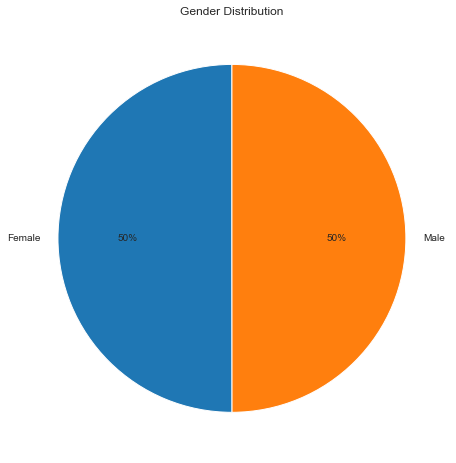

In [9]:
fig,ax =plt.subplots(figsize=(10,8))
df.gender.value_counts().plot(kind='pie', startangle=90,autopct ='%.0f%%',ylabel='',title='Gender Distribution')

### - Who has more long hair between the genders

In [10]:
long_hair = df[df['long_hair']==1]
df[df['long_hair']==1]['gender'].value_counts()

Female    2184
Male      2165
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

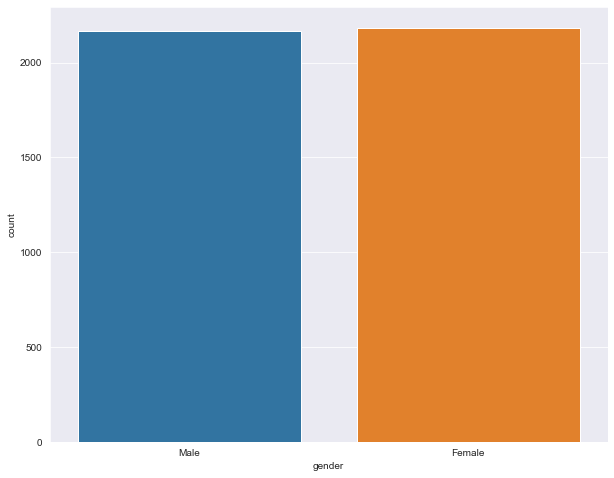

In [11]:
fig,ax =plt.subplots(figsize=(10,8))
sns.countplot(data=long_hair, x='gender')

Observation: Female tends to slightly have more longer hair than male

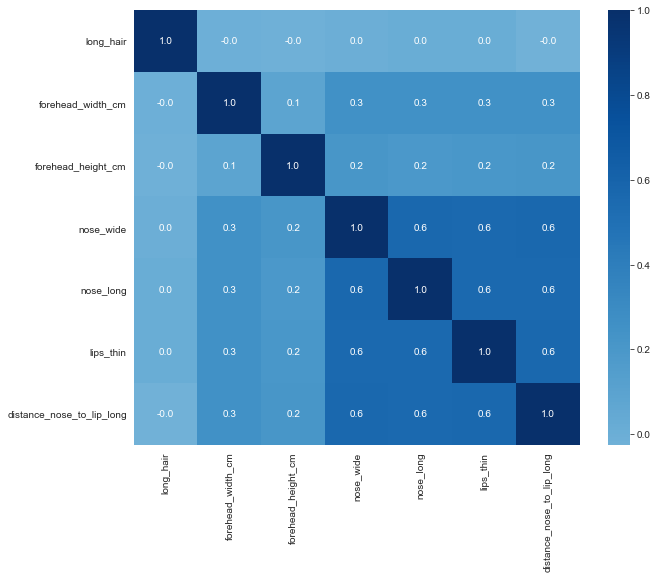

In [73]:
fig,ax=plt.subplots(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation,cmap='Blues',cbar=True,center=0,fmt='.1f',annot=True)
plt.show()

## KNN Classification

In [12]:
X= df.drop('gender',axis=1).values
y= df['gender'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [14]:
#Encode the Categorical Variables
labelEnc =LabelEncoder()
y_train = labelEnc.fit_transform(y_train)
y_test =labelEnc.transform(y_test)

In [15]:
#Scale the dependent variable
scale= StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [16]:
# Checking for the neighbors with the best accuracy
test_accuracy={}
train_accuracy ={}
neighbors = np.arange(1,20,1)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    test_accuracy[neighbor] = knn.score(X_test,y_test)
    train_accuracy[neighbor] = knn.score(X_train,y_train)

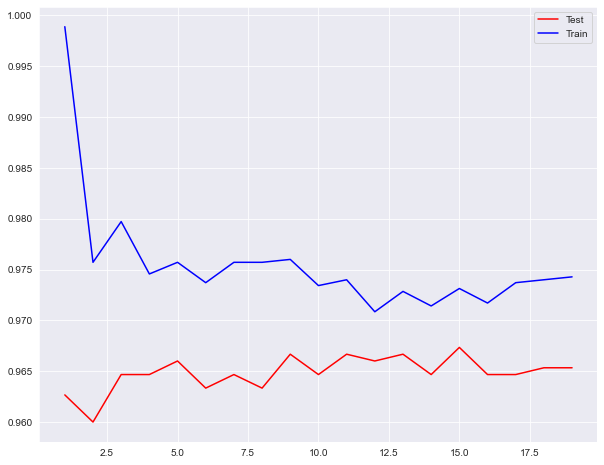

In [72]:
fig =plt.figure(figsize=(10,8))
plt.plot(neighbors,test_accuracy.values(),label='Test',color='r')
plt.plot(neighbors,train_accuracy.values(),label='Train',color='b')
plt.legend()
plt.show()

Observation: We can observe that we get maximum testing accuracy when k= 15. So we create a KNN classifier with number of neighbors equals 15

In [55]:
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]
knn_accuracy = knn.score(X_test,y_test)
f1 =f1_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

results =pd.DataFrame([['KNN Classification',knn_accuracy,pre,rec,f1,auc_score]], columns=['Model','Accuracy','Precision','Recall','F1-Score','Auc Score'])
results

,Model,Accuracy,Precision,Recall,F1-Score,Auc Score
0,KNN Classification,0.967355,0.974834,0.960836,0.967784,0.995439


Observation:
- The KNN Classification model with 15 number of neighbors has 96.7% accuracy
- The senstivity is 96%
- The specificty is 97%

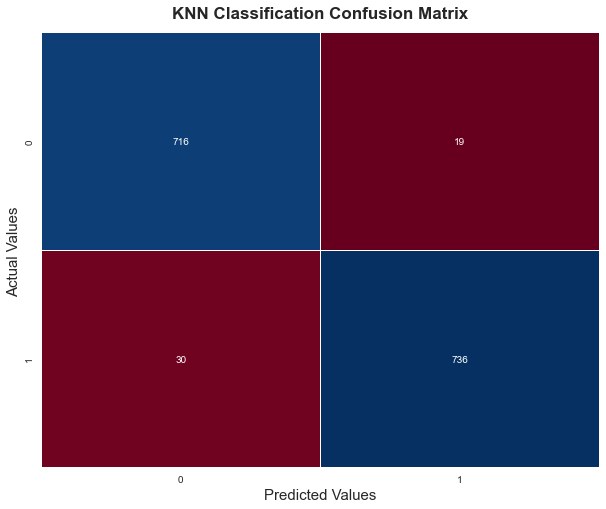

In [71]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, cmap='RdBu',annot=True,fmt='.0f',linewidth=0.1)
plt.xlabel('Predicted Values',fontsize=15)
plt.ylabel('Actual Values',fontsize=15)
plt.title('KNN Classification Confusion Matrix',fontsize=17,y=1.02,weight='bold')
plt.show()

### Classification Roc Curve

In [20]:
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test,y_pred_prob)
print(f'The Area Under ROC Curv Score is {auc_score*100}%')

The Area Under ROC Curv Score is 99.16067210173885%


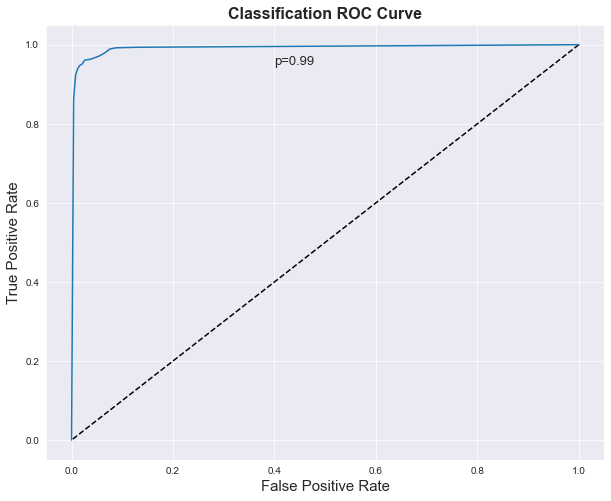

In [70]:
fig= plt.figure(figsize=(10,8))
plt.plot([1,0],[1,0],'k--')
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Classification ROC Curve',fontsize=16, weight ='bold')
plt.annotate('p=0.99',xy=(0.4,0.95),fontsize=13)
plt.show()

Observation:

**ROC (Receiver Operating Characteristic) Curve**

It is the plot of True Positive Rate against False Postive Ratefor the different possible cutpoints of a diagnostic test

An ROC Curve demostrate several things, including;
- It shows the trade off between sensitivity and specificity; has an increase in sensitivity will be accompanied by a decrease in specificity
- The closer the curve follows the left-hand border and then the top right border of the ROC space, the more accurate the test
- The closer the curve is to the 45 degree diagonal line, the lesser the accuracy of the test
- the area under the curve(AUC) is the measure of test accuracy

## Linear Regression

In [54]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log= logreg.predict(X_test)
y_pred_prob_log = logreg.predict_proba(X_test)[:,1]
log_accuracy = logreg.score(X_test,y_test)
f1_log =f1_score(y_test,y_pred_log)
rec_log= recall_score(y_test,y_pred_log)
pre_log = precision_score(y_test,y_pred_log)
auc_score_log = roc_auc_score(y_test,y_pred_prob_log)

results_log =pd.DataFrame([['Logistic Regression',log_accuracy,pre_log,rec_log,f1_log,auc_score_log]], columns=['Model','Accuracy','Precision','Recall','F1-Score','Auc Score'])
results_log

,Model,Accuracy,Precision,Recall,F1-Score,Auc Score
0,Logistic Regression,0.96469,0.966013,0.964752,0.965382,0.995439


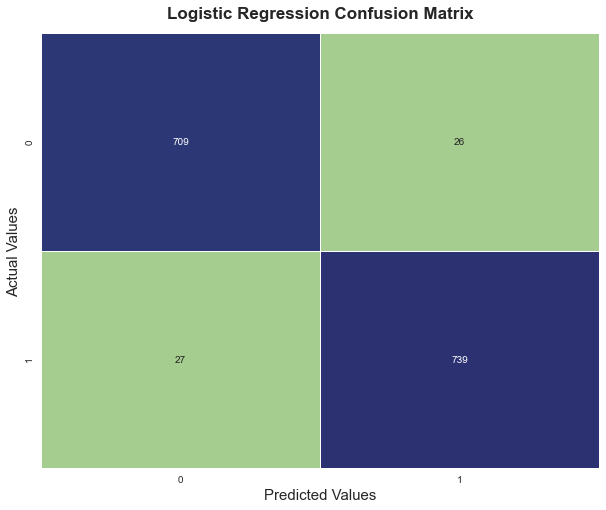

In [69]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred_log), cmap='crest',cbar=None, fmt='.0f',linewidth=0.1,annot=True)
plt.xlabel('Predicted Values',fontsize=15)
plt.ylabel('Actual Values',fontsize=15)
plt.title('Logistic Regression Confusion Matrix',fontsize=17,y=1.02,weight='bold')
plt.show()

### Logistic Regression ROC Curve

In [46]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob_log)

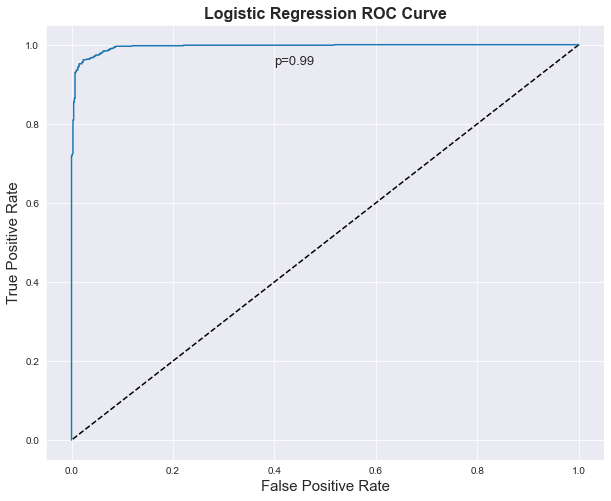

In [68]:
fig= plt.figure(figsize=(10,8))
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Logistic Regression ROC Curve',fontsize=16, weight ='bold')
plt.annotate('p=0.99',xy=(0.4,0.95),fontsize=13)
plt.show()

In [53]:
pd.concat([results,results_log],ignore_index=True)

,Model,Accuracy,Precision,Recall,F1-Score,Auc Score
0,KNN Classification,0.967355,0.974834,0.960836,0.967784,0.995439
1,Logistic Regression,0.964690,0.966013,0.964752,0.965382,0.995439


**Conclusion**:

In this project I worked on a dataset of facial features and tried to predict gender according to those characteristics. During the presentation of the data it could be seen that there is a correlation between the forehead and nose fillers and the gender type. No correlation was found between hair length and gender. In the model training it can be seen that the percentage of accuracy in all of them is relatively high - over 95% for all models, and out of them the model KNN showed the highest percentage of accuracy-97%.

In [ ]:
Evaluating Multiple Models

In [84]:
models = {'Logistic Regression': LogisticRegression(),'KNN Classification':KNeighborsClassifier(),'Decision Tree Classifier':DecisionTreeClassifier()}
results=[]
for model in models.values():
    kf= KFold(n_splits=6,shuffle=True, random_state=40)
    cv = cross_val_score(model, X_train,y_train, cv=kf)
    results.append(cv)

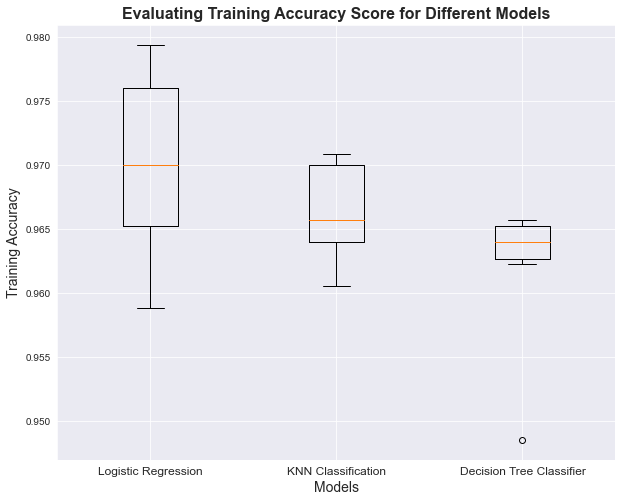

In [85]:
fig,ax=plt.subplots(figsize=(10,8))
plt.boxplot(results,labels=models.keys())
plt.ylabel('Training Accuracy',fontsize=14)
plt.xlabel('Models',fontsize=14)
plt.title('Evaluating Training Accuracy Score for Different Models',fontsize=16,weight='bold')
plt.xticks(fontsize=12)
plt.show()

According to boxplot shown above, Logistic Regression Model has the best training accuracy for the problem at hand

In [93]:
for name, model in models.items():
    model.fit(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print('{} Test Accuracy is {}'.format(name,test_score))

Logistic Regression Test Accuracy is 0.9646902065289806
KNN Classification Test Accuracy is 0.966022651565623
Decision Tree Classifier Test Accuracy is 0.9653564290473018
